# Visualize segreg results

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_max_y_per_x(data):
    """
    Get maximum y value from y values of the same x.
    Args:
      data: A list of tuples containing (x, y) data points.
    Returns:
    (x_values, max_y_values): A tuple containing two arrays.
    """

    # Create a dictionary to store max y for each unique x
    max_y_by_x = {}
    for x, y in data:
        if x not in max_y_by_x:
            max_y_by_x[x] = y
        else:
            max_y_by_x[x] = max(max_y_by_x[x], y)

    # Extract unique x values and corresponding max y values
    x_values = list(max_y_by_x.keys())
    max_y_values = list(max_y_by_x.values())

    return x_values, max_y_values

In [3]:
txtfile = r"results_373_231009_SoRa_Blk_20x1x_img_373_231010_NSPARC_Reg2_40xOil_img_mi_xyzTz.txt"
txtfile = r"results_373_231009_SoRa_Blk_20x1x_seg_373_231128_AX_Sect3_25xOil_img_roi3_mi_xyzTz.txt"
txtfile = r"results_250131_SoRa_Reg2_10x1x_seg_250131_SoRa_Reg2_20x1x_z4060_img_mi_xyzTz.txt"

In [4]:
data = np.genfromtxt(txtfile, delimiter=',')
z, mi = get_max_y_per_x(data)
mi = [m * 1 for m in mi]

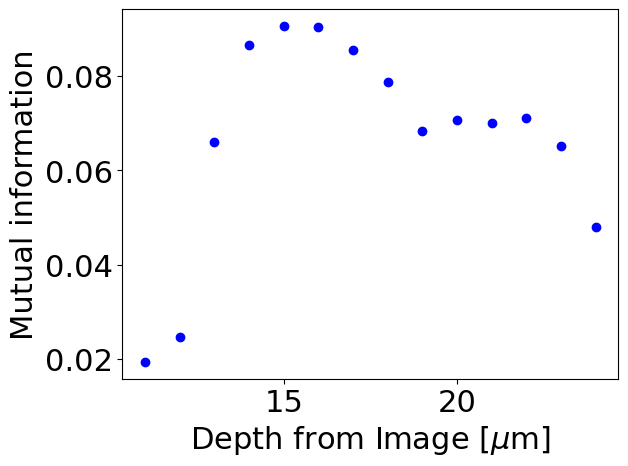

In [5]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots()
l1, = ax.plot(z, mi, 'o', c = "blue")

plt.ylabel('Mutual information')
plt.xlabel('Depth from Image [$\mu$m]')

# plt.ylim([0, 0.2])
# plt.ylim([0, 0.6])
plt.savefig("align_result_vis_depth_vs_mi_%s.png" % Path(txtfile).stem)